## DATA COLLECTION

In [1]:
import yfinance as yf

# Download Netflix stock data from Yahoo Finance
df = yf.download('NFLX',start='2023-01-01', end='2024-12-31')
df.to_csv('netflix_stock_data.csv')

[*********************100%%**********************]  1 of 1 completed


## OVERVIEW OF DATA 

In [2]:
import pandas as pd
netflix = pd.read_csv("netflix_stock_data.csv")

In [3]:
print("First five rows of Data : ")
netflix.head()

First five rows of Data : 


,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,298.059998,298.390015,288.700012,294.950012,294.950012,6764000
1,2023-01-04,298.239990,311.140015,295.510010,309.410004,309.410004,9345100
2,2023-01-05,307.000000,314.179993,304.549988,309.700012,309.700012,8328400
3,2023-01-06,311.570007,316.769989,303.690002,315.549988,315.549988,8959800
4,2023-01-09,316.829987,321.700012,313.220001,315.170013,315.170013,6766600


In [4]:
print("Last five rows of Data : ")
netflix.tail()

Last five rows of Data : 


,Date,Open,High,Low,Close,Adj Close,Volume
389,2024-07-23,647.500000,649.909973,641.000000,642.760010,642.760010,2463600
390,2024-07-24,635.739990,652.419983,632.669983,635.989990,635.989990,4888200
391,2024-07-25,641.000000,649.979980,621.700012,634.090027,634.090027,4554500
392,2024-07-26,645.000000,646.989990,629.770020,631.369995,631.369995,3120700
393,2024-07-29,634.609985,634.609985,623.929993,626.960022,626.960022,2396000


In [32]:
# Setting diplay options to show all values without scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [33]:
# Now 'Volume' column should be shown with scintific notation 'e'
print("Descriptive statistics")
netflix.describe()

Descriptive statistics


,Date,Open,High,Low,Close,Adj Close,Volume
count,394,394.00,394.00,394.00,394.00,394.00,394.00
mean,2023-10-15 09:48:25.583756288,467.93,474.03,462.06,468.10,468.10,5506891.62
min,2023-01-03 00:00:00,287.34,297.45,285.33,292.76,292.76,1403500.00
25%,2023-05-24 06:00:00,363.31,368.93,359.01,364.99,364.99,3298525.00
50%,2023-10-14 12:00:00,438.62,444.51,433.90,440.04,440.04,4549650.00
75%,2024-03-06 18:00:00,581.89,590.82,578.53,583.85,583.85,6309350.00
max,2024-07-29 00:00:00,690.00,697.49,684.72,690.65,690.65,28430300.00
std,NaN,116.59,117.34,115.54,116.48,116.48,3795937.04


In [7]:
# See the shape of dataset (Row and Columns)
netflix.shape

(394, 7)

In [8]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       394 non-null    object 
 1   Open       394 non-null    float64
 2   High       394 non-null    float64
 3   Low        394 non-null    float64
 4   Close      394 non-null    float64
 5   Adj Close  394 non-null    float64
 6   Volume     394 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 21.7+ KB


Here, we can see that the Date column is object. I will be converting it to datetime64[ns] format 
for better allotment of the DataType

In [9]:
netflix['Date']=pd.to_datetime(netflix['Date'])

In [10]:
#Check the information about the DataFrame to see if changes were made
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       394 non-null    datetime64[ns]
 1   Open       394 non-null    float64       
 2   High       394 non-null    float64       
 3   Low        394 non-null    float64       
 4   Close      394 non-null    float64       
 5   Adj Close  394 non-null    float64       
 6   Volume     394 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 21.7 KB


# DATA CLEANING

In [11]:
# see if our data contain any null values
netflix.isnull()
# This will return a Boolean series either True (if our data does not contain missing values) or 
# False (if there are Missing Values)

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
389,False,False,False,False,False,False,False
390,False,False,False,False,False,False,False
391,False,False,False,False,False,False,False
392,False,False,False,False,False,False,False


In [12]:
# Display the number of null values in each column
null_counts= netflix.isnull().sum()
print("Number of null values in each column:")
print(null_counts)

Number of null values in each column:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [13]:
# Check for dupicaton
print('NO of duplicated values :',netflix.duplicated().sum())
netflix.duplicated()

NO of duplicated values : 0


0      False
1      False
2      False
3      False
4      False
       ...  
389    False
390    False
391    False
392    False
393    False
Length: 394, dtype: bool

# Time Series Analysis

In [14]:
import matplotlib.pyplot as plt
# Time series plot funtion
def time_series_plot(dataframe):
    x = dataframe['Date']
    column = input("Enter the column name to plot the line graph : ")
    if column in dataframe.columns :
        plt.figure(figsize=(10,6))
        y = dataframe[column]
        plt.plot(x,y)
        plt.xlabel('Date')
        plt.ylabel(column)
        plt.title("Time Series plot :" + column)
        plt.show()
    else :
        print("Error")

Enter the column name to plot the line graph : Close


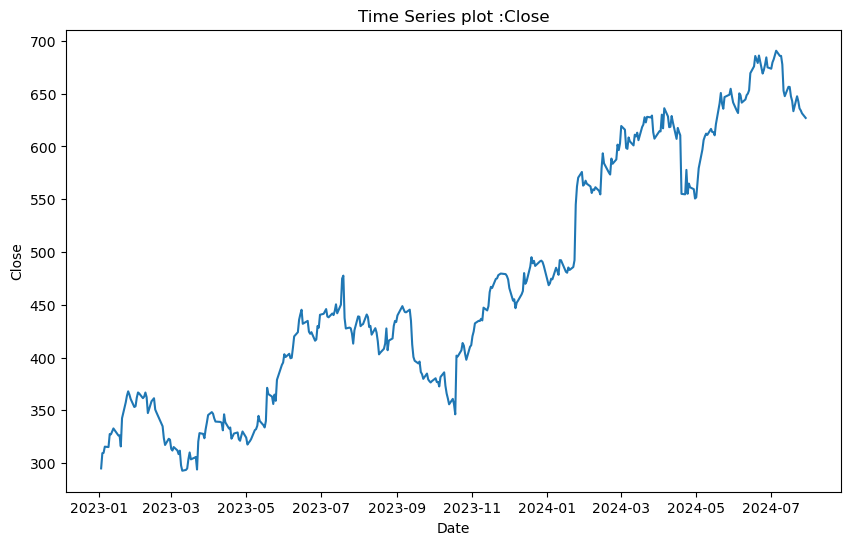

In [15]:
# Time series plot for 'Close'
time_series_plot(netflix)

Enter the column name to plot the line graph : Open


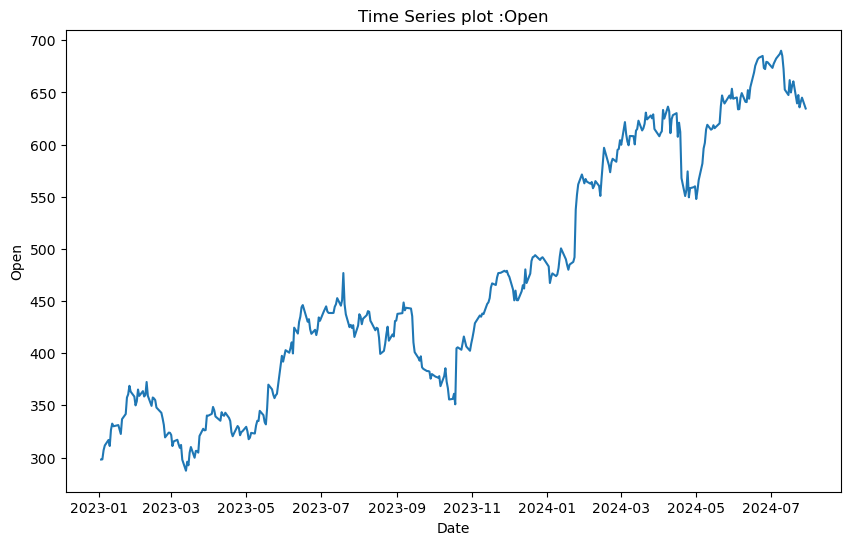

In [16]:
# Time Series plot for 'Open'
time_series_plot(netflix)

Enter the column name to plot the line graph : Volume


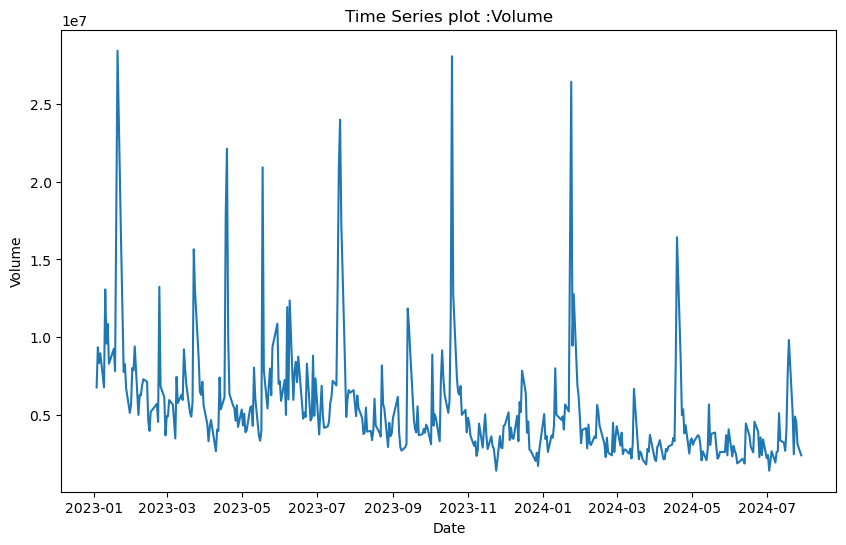

In [18]:
# Time series plot for Volume
time_series_plot(netflix)

##### Here, we can see that Open and Close are almost of the same pattern. Lets see a side by side comparision to identify any insights, if any

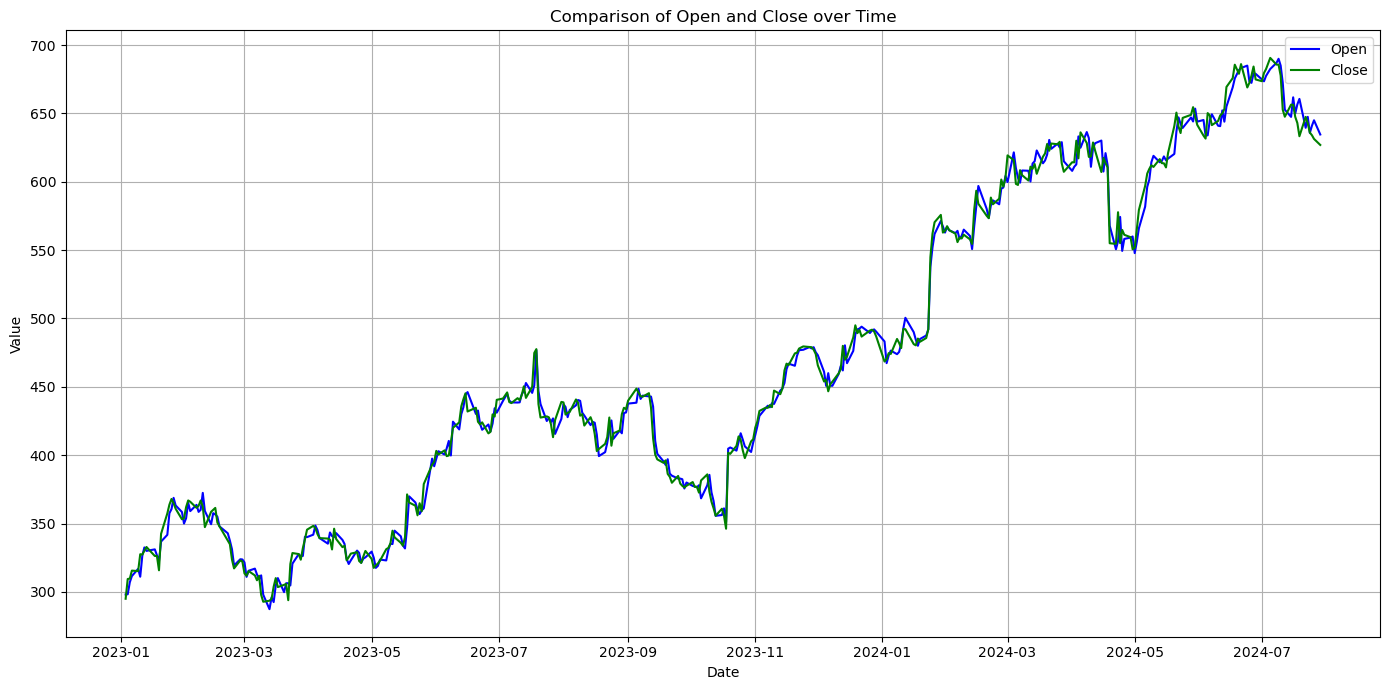

In [19]:
import matplotlib.pyplot as plt

def comparative_plot(dataframe, col1, col2):
    x = dataframe['Date']
    
    plt.figure(figsize=(14, 7))
    
    y1 = dataframe[col1]
    y2 = dataframe[col2]
    
    plt.plot(x, y1, label=col1, color='blue')
    plt.plot(x, y2, label=col2, color='green')
    
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(f'Comparison of {col1} and {col2} over Time')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Call the function with the 'netflix' dataframe
comparative_plot(netflix, 'Open', 'Close')


#### Upon examining the side-by-side comparison of the "Open" and "Close" time series plots, it becomes evident that the patterns exhibited by both columns are strikingly similar. However, subtle differences can be observed between the two. In the "Open" plot, the price initiates with a slight uptick at the beginning of the trading day, indicating an initial surge in market activity. Conversely, in the "Close" plot, the price experiences a marginal decline towards the end of the trading day, reflecting a potential decrease in market sentiment as trading comes to a close. Despite these minor discrepancies, the overarching trends and fluctuations in both plots align closely, suggesting a strong correlation between the opening and closing prices of the Netflix stock over the analyzed time period.

# Descriptive Statistics

In [23]:
def descriptive_statistics(dataframe):
    open_stats = dataframe["Open"].describe()
    close_stats = dataframe["Close"].describe()
    # Print the descriptive statistics
    print("Descriptive Statistics for the 'Open' column:")
    print(open_stats)
    print("\nDescriptive Statistics for the 'Close' column:")
    print(close_stats)

In [24]:
descriptive_statistics(netflix)

Descriptive Statistics for the 'Open' column:
count    394.000000
mean     467.929187
std      116.586612
min      287.339996
25%      363.310013
50%      438.625000
75%      581.887482
max      690.000000
Name: Open, dtype: float64

Descriptive Statistics for the 'Close' column:
count    394.000000
mean     468.103630
std      116.478472
min      292.760010
25%      364.992493
50%      440.044998
75%      583.852509
max      690.650024
Name: Close, dtype: float64


## Correlation Matrix

In [31]:
def correlation(dataframe):
    columns_of_interest = ['Open','High','Low','Close']
    matrix = dataframe[columns_of_interest].corr()
    print("Correlation Matrix : ")
    print(matrix)
correlation(netflix)

Correlation Matrix : 
       Open  High  Low  Close
Open   1.00  1.00 1.00   1.00
High   1.00  1.00 1.00   1.00
Low    1.00  1.00 1.00   1.00
Close  1.00  1.00 1.00   1.00


## Highest and Lowest Share Prices

In [34]:
max_close_row = netflix.loc[netflix['Close'].idxmax()]
max_close_row = netflix.loc[netflix['Close'].idxmax()]
max_close_row = netflix.loc[netflix['Close'].idxmax()]
print(max_close_row)

Date         2024-07-05 00:00:00
Open                      682.51
High                      697.49
Low                       677.23
Close                     690.65
Adj Close                 690.65
Volume                   2659100
Name: 377, dtype: object
